In [1]:
#importing libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.image as mpimg
import plotly as py 
import plotly.tools as tls 
import plotly.graph_objs as go 
import plotly 
import plotly.figure_factory as ff 
from matplotlib.colors import ListedColormap

import seaborn as sns
import datetime as date_time

In [2]:
#importing csv file

netflix = pd.read_csv('C:/Users/Kaytie/Desktop/School/Regis University/Fall 2021/MSDS 670/Week 8/netflix_titles.csv')

In [3]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
#dropping NA values

netflix.dropna(inplace = True)

In [5]:
#filtering out any values before 2008

filter = netflix[netflix['release_year'] >= 2008]

In [6]:
#sorting data into dataframes based on desired analysis 

director = filter['director'].value_counts()

category = filter['listed_in'].value_counts()

country = filter['country'].value_counts()

year_r = filter['release_year'].value_counts(sort = False)

rating = filter['rating'].value_counts()

type = filter['type'].value_counts()

In [7]:
#changing dates to a pandas format

date = filter['date_added']=pd.to_datetime(filter['date_added'], dayfirst=False)

In [8]:
country2 = country.head(13).sort_values(ascending = True)

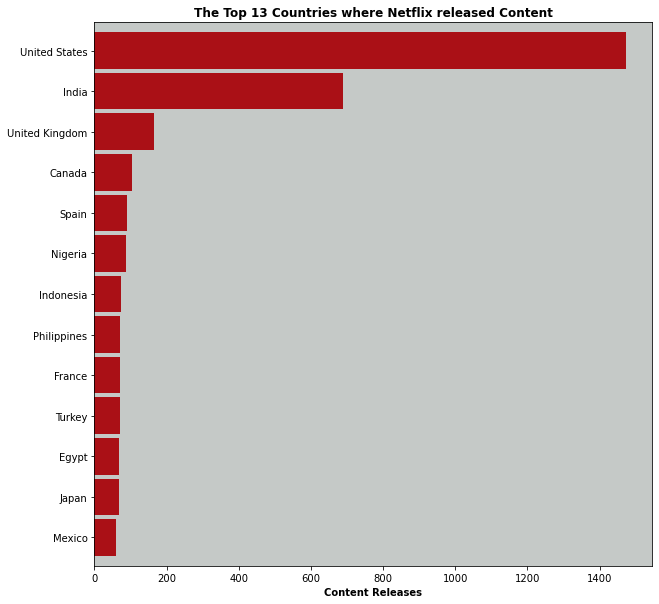

In [9]:
#creating a color palette to use consistenly across charts and plots
#creating a chart to illustrate data for countries of content releases 

pal1 = sns.color_palette('Reds_r')
sns.set_palette(pal1)

fig, ax = plt.subplots(figsize = (12,12))

country2.plot(kind = 'barh', figsize = (10,10), zorder = 2, width = 0.9)

ax.set_title('The Top 13 Countries where Netflix released Content', weight = 'bold')
ax.set_xlabel('Content Releases', weight = 'bold')
ax.set_facecolor('#C5C9C7')

In [10]:
#creating additional dataframes to meet desired analysis specifications

date2 = date.value_counts()
year_r2 = year_r.sort_values(ascending = True)

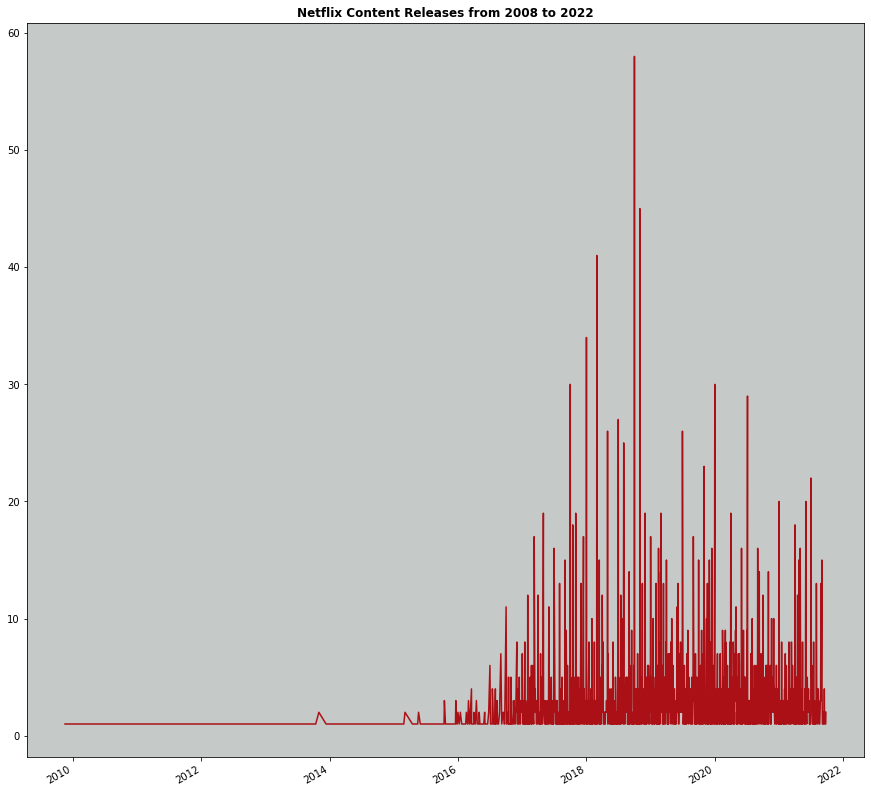

In [11]:
#creating a chart depicting content releases from desired year range 

fig, ax = plt.subplots(figsize = (15,15))

date2.plot(figsize = (15,15))

ax.set_title('Netflix Content Releases from 2008 to 2022', weight = 'bold')
ax.set_facecolor('#C5C9C7')

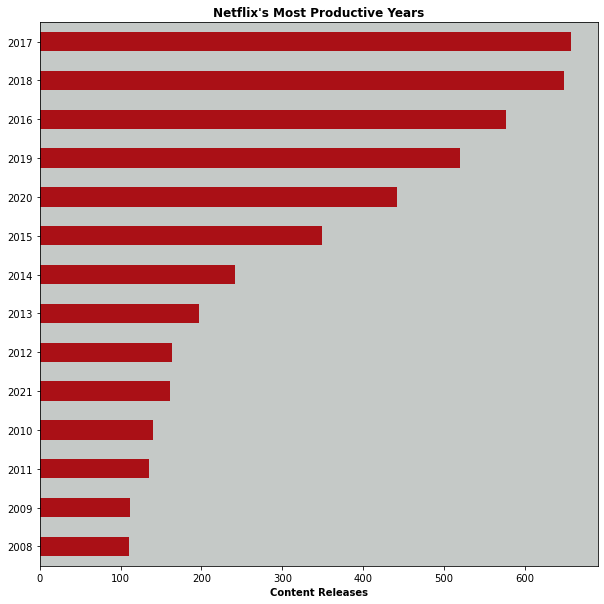

In [12]:
#creating a chart showing producivity sorted by highest productivity for Netflix 

fig, ax = plt.subplots(figsize = (12,12))

year_r2.plot(kind = 'barh', figsize = (10,10))
ax.set_title("Netflix's Most Productive Years", weight = 'bold')
ax.set_xlabel('Content Releases', weight = 'bold', size = 10)
ax.set_facecolor('#C5C9C7')

In [13]:
#creating a secondary dataframe for analysis

director2 = filter.value_counts('director').sort_values(ascending = False).head(10)

In [14]:
#creating a crosstab for a frequency count of directors and sorting by highest count

crosstab_director = pd.crosstab(index = filter['director'],
                       columns = 'count').sort_values(by = 'count', ascending = False).head(13)
crosstab_director

col_0,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Don Michael Paul,10
Hakan Algül,8
Ryan Polito,8
Shannon Hartman,8


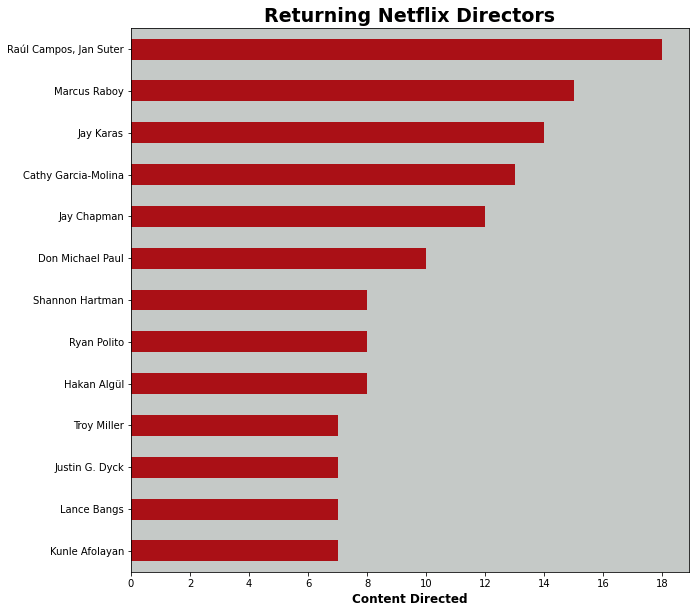

In [15]:
#creating a chart to illustrate the data from the previously built cross tab for director data

x_ticks = np.arange(0, 20, 2)

fig, ax = plt.subplots(figsize = (12,12))

crosstab_director.sort_values(by = 'count', ascending = True).plot(kind = 'barh', figsize = (10,10), legend = None, ax=ax)
ax.set_title('Returning Netflix Directors', weight = 'bold', size = 19)
ax.set_xlabel('Content Directed', weight = 'bold', size = 12)
ax.set_xticks(x_ticks)
ax.set_ylabel('')
ax.set_facecolor('#C5C9C7')

In [16]:
#filtering ratings based upon universal standards and dropping less common uses

rate_type = filter[(filter['rating'] == 'G') | (filter['rating'] == 'PG') | 
          (filter['rating'] == 'PG-13') | (filter['rating'] == 'R') | (filter['rating'] == 'NR') | (filter['rating'] == 'TV-14')
                  | (filter['rating'] == 'TV-G') | (filter['rating'] == 'TV-MA') | (filter['rating'] == 'TV-PG')]

In [29]:
r_o = ['G','TV-G','PG','TV-PG','PG-13','TV-14','R','TV-MA','NR']


In [17]:
#creating a crosstab to examine movies and tv shows against ratings assigned
    
crosstab_typerate = pd.crosstab(index = rate_type['type'],
                       columns = rate_type['rating'])
crosstab_typerate

rating,G,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG
type,,,,,,,,,
Movie,14,48,180,311,577,975,77,1640,343
TV Show,0,0,0,0,0,35,2,81,13


In [31]:
crosstab_typerate = crosstab_typerate.reindex(r_o, axis='columns')

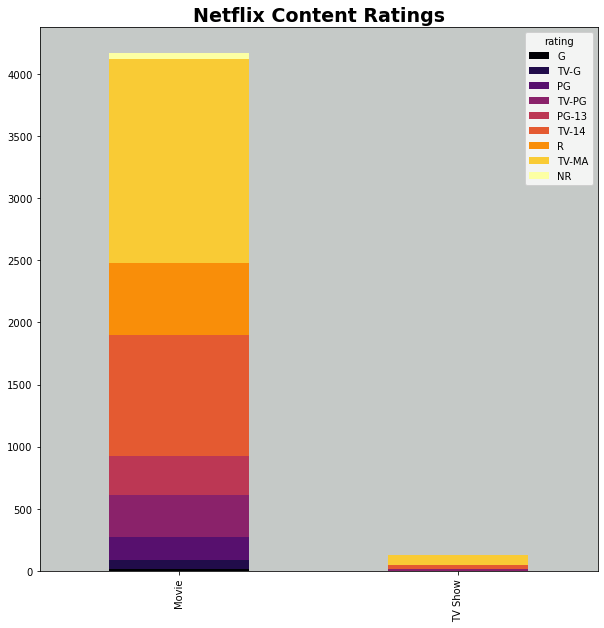

In [32]:
#creating a chart showing the data from the previously built crosstab 
my_cmap = plt.get_cmap('inferno')

fig, ax = plt.subplots(figsize = (12,12))

crosstab_typerate.plot(kind = 'bar', stacked = True, figsize = (10,10), cmap=my_cmap, ax=ax)
ax.set_title('Netflix Content Ratings', weight = 'bold', size = 19)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_facecolor('#C5C9C7')

In [ ]:
#sorting category data by highest frequency count and limiting the list to thirty different categories

category_cross = category.sort_values(ascending = False).head(30)

In [ ]:
#creating a chart showing the data from the limited category dataframe

fig, ax = plt.subplots(figsize = (12,12))

category_cross.sort_values(ascending = True).plot(kind = 'barh', figsize = (10,10))
ax.set_title('The Thirty Most Popular Categories of Netflix Content', weight = 'bold', size = 18)
ax.set_facecolor('#C5C9C7')


In [ ]:
#creating a crosstab for release year versus type of content released 

cross_typeyear = pd.crosstab(index = filter['release_year'],
                       columns = filter['type'])
cross_typeyear

In [ ]:
#creating a chart to illustrate the previously created crosstab

fig, ax = plt.subplots(figsize = (15,15))

cross_typeyear.plot(figsize = (10,10), kind = 'bar', color=['darkred', 'tomato'], ax = ax)

ax.set_title('Types of Netflix Content Released from 2008 to 2022', weight = 'bold', size = 18)
ax.set_xlabel('')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_facecolor('#C5C9C7')